# **Importing Data and Libraries**

In [1]:

import numpy as np 
import pandas as pd 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
pd.set_option('max_colwidth', -1)

C:\Users\nipun\AppData\Local\Temp\ipykernel_14756\2756304771.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# **Learning about the data**

In [2]:
dataset=pd.read_csv('data.csv')
display(dataset.tail())

,Sl no,Tweets,Search key,Feeling
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkchesco @EAStarWars Controversy THEY caused.Yes, we all know to expect this kind of corporate bullshitting by this point, but it's still brazen and irritating as f***.It's a good game now that's getting even better.Still shoulda been that way in Day 1.So many games releasing like this 😔""",irritating,angry
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’s so irritating 😡 I wish people cared about their kids more wtf""",irritating,angry
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@MamataOfficial G aapne besharmi ki saari hadhe paar kar di. Janta kabhi bhi aapko maaf nahi karegi. You are absolutely wrong person sorry to say that you are so irritating. https://t.co/poUdtAnq1A""",irritating,angry
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i hate. indie alternative whatever genre music that;s ""deep"" but the fucking singing doesn't match the bpm of the soundtrack and shit just sounds off-tune and give you an irritating headache.aka mitski""",irritating,angry
10016,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i hate. indie alternative whatever genre music that;s ""deep"" but the fucking singing doesn't match the bpm of the soundtrack and shit just sounds off-tune and give you an irritating headache.aka mitski""",irritating,angry


# **Dataset Summary**

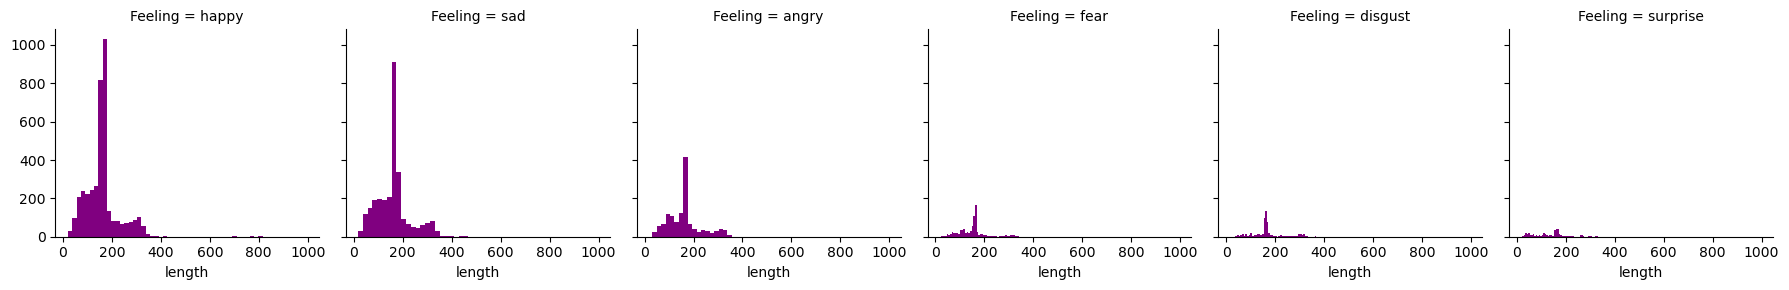

In [3]:
dataset.describe(include='all')
dataset['length'] = dataset['Tweets'].apply(len)
dataset.head()
graph = sns.FacetGrid(data=dataset,col='Feeling')
graph.map(plt.hist,'length',bins=50,color='Purple')

 **GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW**

In [4]:
val = dataset.groupby('Feeling').mean()
val


C:\Users\nipun\AppData\Local\Temp\ipykernel_14756\1200857858.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val = dataset.groupby('Feeling').mean()


,Sl no,length
Feeling,,
angry,4932.246085,165.794183
disgust,4262.874411,170.572998
fear,4122.549247,152.156431
happy,4560.091141,160.319501
sad,5739.734995,161.599158
surprise,7632.000000,136.441103


** FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS**

In [5]:
val.corr()

,Sl no,length
Sl no,1.000000,-0.742981
length,-0.742981,1.000000


In [6]:
dataset.Feeling.value_counts()


happy       3928
sad         2849
angry       1341
fear        863 
disgust     637 
surprise    399 
Name: Feeling, dtype: int64

**PLOT THE DATASET**

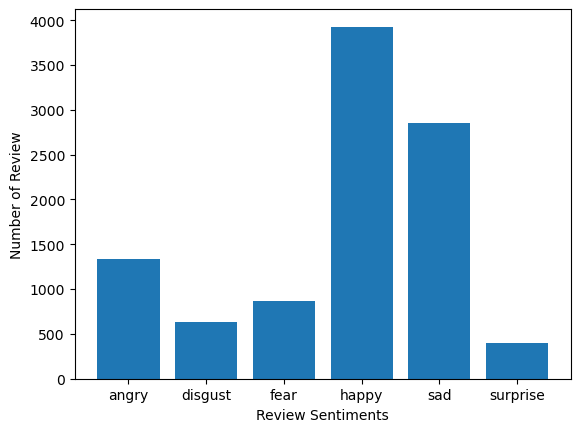

In [7]:
Sentiment_val=dataset.groupby('Feeling').count()
plt.bar(Sentiment_val.index.values, Sentiment_val['Tweets'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

**Tokenizer to remove unwanted elements from out data like symbols and numbers**

In [8]:

tf=TfidfVectorizer()
Fit = tf.fit(dataset['Tweets'])
text_tf = Fit.transform(dataset['Tweets'])

# **Train and Test data**

In [9]:
x = text_tf
# y=dataset['Emotion'].astype('int')
y = dataset['Feeling']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [10]:
print(x,y)

  (0, 35925)	0.18889114795341877
  (0, 35705)	0.12041676417687773
  (0, 33470)	0.07313885313492803
  (0, 33350)	0.1519494914097459
  (0, 33307)	0.3178275121382052
  (0, 32927)	0.13565715341950801
  (0, 28573)	0.05763504196534996
  (0, 27708)	0.3077948120936337
  (0, 24997)	0.21453585074911183
  (0, 22061)	0.20651419742228036
  (0, 21782)	0.3178275121382052
  (0, 20376)	0.3178275121382052
  (0, 17354)	0.19999698689276532
  (0, 16324)	0.0896971459376978
  (0, 14211)	0.14224307327704955
  (0, 11746)	0.29365451557282474
  (0, 11663)	0.22113552587668348
  (0, 11464)	0.19844676446658185
  (0, 11169)	0.18947239911302757
  (0, 10276)	0.040416484830638505
  (0, 5887)	0.13698626236202607
  (0, 4091)	0.11444491310751496
  (0, 1973)	0.3178275121382052
  (1, 39531)	0.31856666742510253
  (1, 39527)	0.3327398493146491
  :	:
  (10016, 24033)	0.14021596337018286
  (10016, 24029)	0.058168213443379906
  (10016, 22541)	0.15076334873484187
  (10016, 21892)	0.22871378917372315
  (10016, 20909)	0.17550348586

# **Implementing Decision Tree Classifier**

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
dtt_score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",dtt_score)
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 351    0    1   28   15    0]
 [   1  179    1   16    1    0]
 [   1    0  205   37    6    1]
 [  24   10   33 1099   51    5]
 [  13    3    7   95  712    0]
 [   0    0    0   14    2   95]]
Score: 87.86
Classification Report:
              precision    recall  f1-score   support

       angry       0.90      0.89      0.89       395
     disgust       0.93      0.90      0.92       198
        fear       0.83      0.82      0.82       250
       happy       0.85      0.90      0.88      1222
         sad       0.90      0.86      0.88       830
    surprise       0.94      0.86      0.90       111

    accuracy                           0.88      3006
   macro avg       0.89      0.87      0.88      3006
weighted avg       0.88      0.88      0.88      3006



# **Implementing Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
lr_preddt = lr.predict(x_test)
print("Confusion Matrix for Logistic regression:")
print(confusion_matrix(y_test,lr_preddt))

logi_score = round(accuracy_score(y_test,lr_preddt)*100,2)
print("Score:",logi_score)

print("Classification Report:")
print(classification_report(y_test,lr_preddt))

Confusion Matrix for Logistic regression:
[[ 254    0    0  100   41    0]
 [   0   96    0   91   11    0]
 [   1    0  114  125   10    0]
 [   0    0    1 1211   10    0]
 [   3    0    1  149  677    0]
 [   0    0    0   64    5   42]]
Score: 79.64
Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.64      0.78       395
     disgust       1.00      0.48      0.65       198
        fear       0.98      0.46      0.62       250
       happy       0.70      0.99      0.82      1222
         sad       0.90      0.82      0.85       830
    surprise       1.00      0.38      0.55       111

    accuracy                           0.80      3006
   macro avg       0.93      0.63      0.71      3006
weighted avg       0.84      0.80      0.79      3006



C:\Users\nipun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Implementing k Nearest Neighbors**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

lir = KNeighborsClassifier(n_neighbors=6,algorithm='brute')
lir.fit(x_train,y_train)
lir_preddt = lir.predict(x_test)
print("Confusion Matrix for kNN:")
print(confusion_matrix(y_test,lir_preddt))

knn_score = round(accuracy_score(y_test,lir_preddt)*100,2)
print("Score:",knn_score)

print("Classification Report:")
print(classification_report(y_test,lir_preddt))

Confusion Matrix for kNN:
[[229   5  11  94  55   1]
 [ 13 123   6  27  28   1]
 [ 16   3 145  57  27   2]
 [ 71  22  34 940 148   7]
 [ 42  15  28 175 569   1]
 [  4   2   2  27  13  63]]
Score: 68.83
Classification Report:
              precision    recall  f1-score   support

       angry       0.61      0.58      0.59       395
     disgust       0.72      0.62      0.67       198
        fear       0.64      0.58      0.61       250
       happy       0.71      0.77      0.74      1222
         sad       0.68      0.69      0.68       830
    surprise       0.84      0.57      0.68       111

    accuracy                           0.69      3006
   macro avg       0.70      0.63      0.66      3006
weighted avg       0.69      0.69      0.69      3006



# **Implementing SVM**

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)
pred2 = clf.predict(x_test)
print(confusion_matrix(y_test,pred2))
svm_score=clf.score(x_test,y_test)*100
print("Score:",svm_score) 
print("Classification Report:")
print(classification_report(y_test,pred2))

[[ 229    0    2  133   31    0]
 [   0   94    0  101    3    0]
 [   0    0  105  141    4    0]
 [   1    0    0 1219    2    0]
 [   3    0    1  190  636    0]
 [   0    0    0   68    0   43]]
Score: 77.3785761809714
Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.58      0.73       395
     disgust       1.00      0.47      0.64       198
        fear       0.97      0.42      0.59       250
       happy       0.66      1.00      0.79      1222
         sad       0.94      0.77      0.84       830
    surprise       1.00      0.39      0.56       111

    accuracy                           0.77      3006
   macro avg       0.93      0.60      0.69      3006
weighted avg       0.84      0.77      0.76      3006



# **Implementing Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)
pred3 = nb.predict(x_test.toarray())
print(confusion_matrix(y_test,pred3))
naiveBayes_score=nb.score(x_test.toarray(),y_test)*100
print("Score:",naiveBayes_score)
print("Classification Report:")
print(classification_report(y_test,pred3))

[[207   2  13  97  70   6]
 [ 10 102   5  39  42   0]
 [ 10   5 115  67  49   4]
 [ 67  16  37 836 235  31]
 [ 65  11  25 175 537  17]
 [  9   1   0  25  13  63]]
Score: 61.876247504990026
Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.52      0.54       395
     disgust       0.74      0.52      0.61       198
        fear       0.59      0.46      0.52       250
       happy       0.67      0.68      0.68      1222
         sad       0.57      0.65      0.60       830
    surprise       0.52      0.57      0.54       111

    accuracy                           0.62      3006
   macro avg       0.61      0.57      0.58      3006
weighted avg       0.62      0.62      0.62      3006



# **Model Analysis**

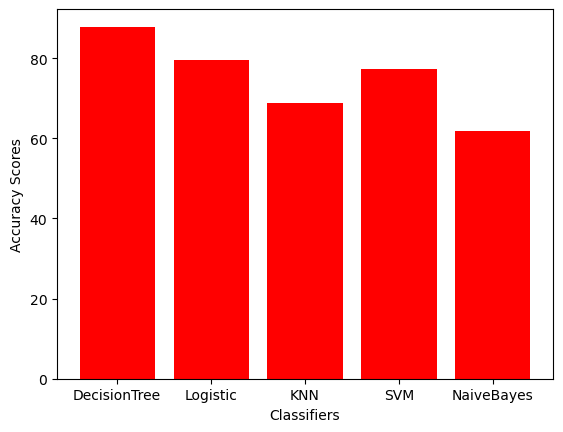

In [16]:
scores=[dtt_score,logi_score,knn_score,svm_score,naiveBayes_score]
title=["DecisionTree","Logistic","KNN","SVM","NaiveBayes"]
plt.bar(title,scores, color ='red')
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Scores")

plt.show()

# **Model for new test data**

In [17]:

inp = "The horror movie was so scary."
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

inp = "John comforts anyone when they are upset or overwhelmed."
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

inp = " A 26 year old man kidnapped, raped & impregnated a 11 year old girl in Ohio"
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

inp = "What a surprise I feel sick now, thank you so much!"
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

inp = "I really love you. Your are sweet and charming."
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

The horror movie was so scary.
Emotion:  fear

John comforts anyone when they are upset or overwhelmed.
Emotion:  sad

 A 26 year old man kidnapped, raped & impregnated a 11 year old girl in Ohio
Emotion:  disgust

What a surprise I feel sick now, thank you so much!
Emotion:  surprise

I really love you. Your are sweet and charming.
Emotion:  happy



In [18]:
import pickle

pickle.dump(tf, open("token.pkl",'wb'))
pickle.dump(dt, open("twitter_data.pkl",'wb'))


In [21]:
inp = input("Enter your Tweet here : ")
text_tf_inp = Fit.transform(pd.Series(inp))
preddt = dt.predict(text_tf_inp)
print(inp)
print("Emotion: ", preddt[0])
print()

Enter your Tweet here : i hate you
i hate you
Emotion:  angry

